## Drone - Battery Voltage Status
## Linear Neural Unit with Least Squares

LNU ... Linear Neural Unit

$\tilde{\textbf{y}} =\textbf{X}^T\cdot\textbf{w}^T$

where $\tilde{\textbf{y}}$ is vector (1-D array) of all outputs of a neuron (in code it is as $y_n$)

$\textbf{w}^T=inv(\textbf{X}^T \cdot \textbf{X})\cdot \textbf{X}^T \cdot \textbf{y}
$


In the example bellow, output $y$ is calculated using two input variables $u_1$ and $u_2$ with their time embedding of 2 samples (i..e two samples back of $u_1$ and $u_2$).
So the feature vector is $\textbf{x}=[1 \ u_1(k-1) \  u_1(k-2) \ u_1(k-1) \ u_2(k-2)]$.
Linear neuron then calculates every single $y(k)$ as $y(k)=\textbf{w}\cdot\textbf{x}$ and for all of them as above.

In the example below, there are data normalization and denormalizaton. Also, the linear neuron can not learn the noise (beacuse the noise is a nonlinear phenomenom), and because the feature vector here corresponds to data behavior, then the trained linear neuron is able to learn proper behavior from noisy data (if we used nonlinear neuron, it will learn noise as well, which will be incorrect in this case)

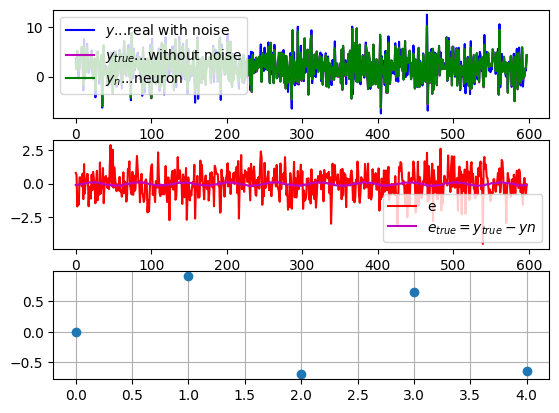

In [4]:
#%matplotlib widget
from numpy import * 
from matplotlib.pyplot import *
## measuring data
#N=100
nu1=2
nu2=2
ny=2
n=1+nu1+nu2

t=arange(0,60,.1)
N=len(t)
u1=sin(2*pi/6*t)
u2=random.randn(N)
y=zeros(N)
X=ones((N,n))
ytrue=zeros(N)
for k in range(2,N):
    ytrue[k]=2+3*u1[k-1]-2*u1[k-2]+2*u2[k-1]-2*u2[k-2]  # data behavior
    y[k]=ytrue[k]+random.randn()   # "measuring" real output with noise
    
u1=(u1-mean(u1))/std(u1)/3
u2=(u2-mean(u2))/std(u2)/3

meany=mean(y)
stdy=std(y)

y=(y-meany)/stdy/3

for k in range(2,N):    
    #filling X matrix
    X[k,1]=u1[k-1]
    X[k,2]=u1[k-2]
    X[k,3]=u2[k-1]
    X[k,4]=u2[k-2]
#====LNU with Least Squares

X=X[2:,:]
y=y[2:]
ytrue=ytrue[2:]

w=dot(dot(linalg.inv(dot(X.T,X)),X.T),y)

yn=dot(X,w)   # neuron output

yn=yn*3*stdy+meany  # returning to original scale of data
y=y*3*stdy+meany

e=y-yn
etrue=ytrue-yn

figure()
subplot(311)
plot(y,'b',label="$y$...real with noise")
plot(ytrue,'m',label="$y_{true}$...without noise")
plot(yn,'g',label="$y_n$...neuron");legend()
subplot(312)
plot(e,'r',label="e")
plot(etrue,'m',label="$e_{true}=y_{true}-y{n}$");legend()
subplot(313)
plot(w,'o');grid()
show()


There are measured data of four control signals for propellers motors (crazy fly drone) and the battery status, i.e., voltage.

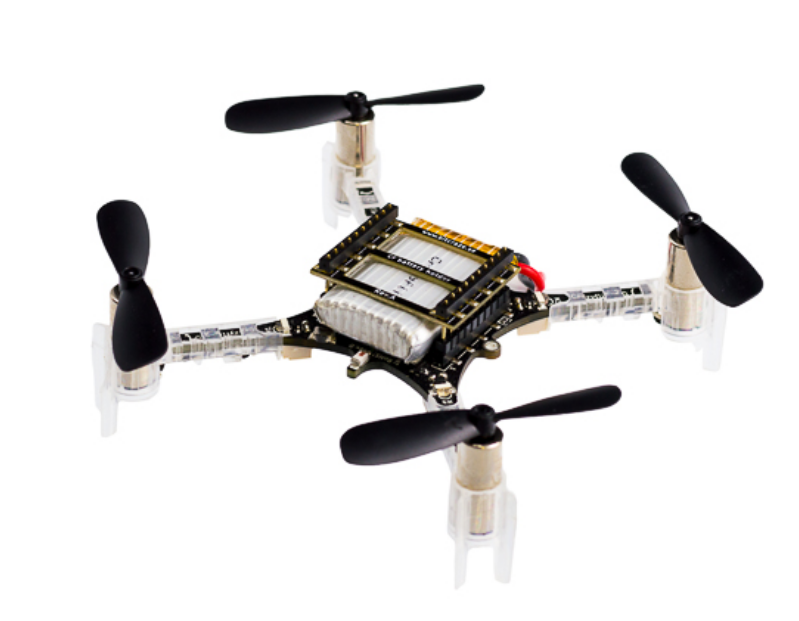
(image adopted from https://www.bitcraze.io/products/old-products/crazyflie-2-0/)

## Task 1
Use data from "battery_motor_log_example1 (no time specified).csv" where we assume data are sampled with constant sampling (if sampling is not constant, you can not train a prediction model with constant prediction horizon, here one sample).
<ul>
    <li>
Apply Linear Neuron and Least Squares direct weight calculation (the simplest one) to predict the battery status. For the beginning, try time embedding be 2 for all input variables to your neuron. Apply also data normalization before training, divide data to training data and testing data to validate how your model works for battery status prediction.
   </li>
   <li>
       Compare in more detail neural output $y_n$ and real target $y$ and calculate the  Pearson's correlation coefficients of neuron output and target data (do it both for training and testing data).
   </li>
</ul>

## Task 2
<ul>
<li>
  Repeat the above <b>Assignment 1</b> for dataset in "battery_motor_log(time specified).csv". The reason is that the data might not be sampled with constant sampling, so you have to verify if the sampling is both constant and same for all data. If sampling is not constant, interpolate data so you get data with constant sampling (and repeat tasks from Task 1).
   </li>  <li>
   Carry out a study for increased time embeddings (1,2,3,4...?) in the feature vector, and observe its effect on training accuracy and on testing accuracy, e.g., via Mean Square Error, or other error criterion.
   </li>
</ul>


